In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data=pd.read_csv("C:\\Users\VANSH AGRAWAL\\Downloads\\indian movies.csv")

In [53]:
data.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50602 non-null  object
 1   Movie Name   50602 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  50602 non-null  object
 4   Rating(10)   50602 non-null  object
 5   Votes        50602 non-null  object
 6   Genre        50602 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [55]:
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Rating(10)'] = pd.to_numeric(data['Rating(10)'], errors='coerce')

In [56]:
data['Timing(min)']=data['Timing(min)'].str.extract('(\d+)').astype(float)

In [57]:
data.dropna(subset=['Year','Rating(10)','Votes','Timing(min)'],inplace=True)

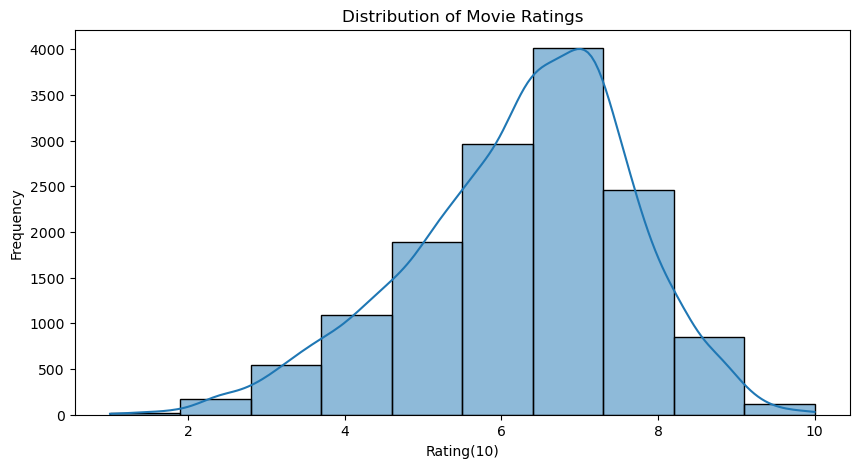

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(data['Rating(10)'],bins=10,kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating(10)')
plt.ylabel('Frequency')
plt.show()

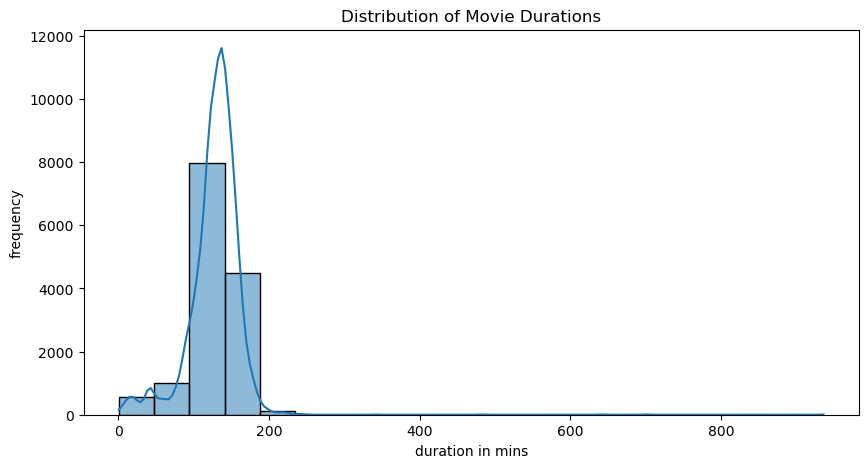

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(data['Timing(min)'],bins=20,kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('duration in mins')
plt.ylabel('frequency')
plt.show()

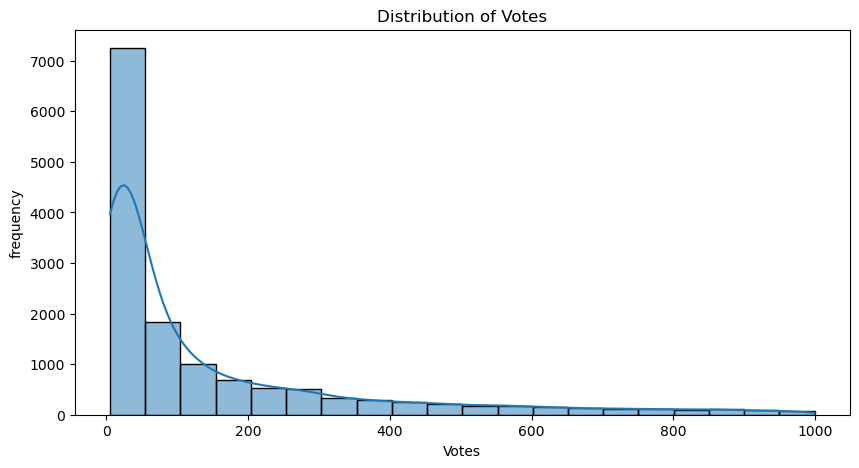

In [60]:
plt.figure(figsize=(10,5))
sns.histplot(data['Votes'],bins=20,kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('frequency')
plt.show()

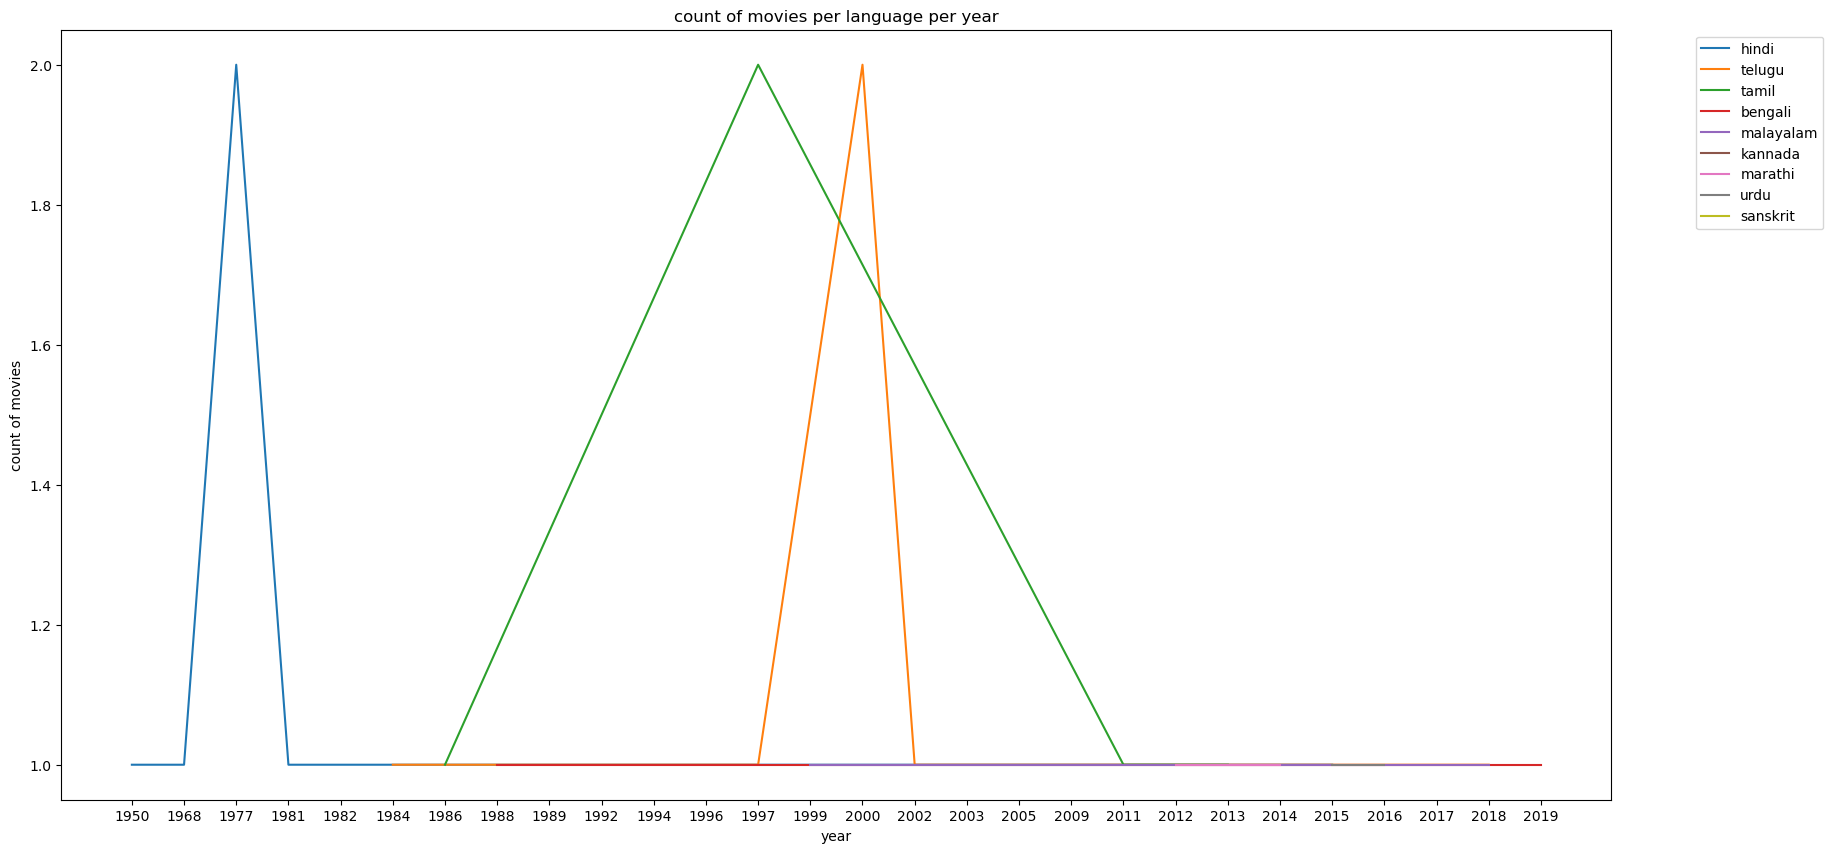

In [61]:

plt.figure(figsize=(20,10))
lang_year=data.iloc[0:50,:].groupby(['Year','Language']).size().reset_index(name='count').head(40)
sns.lineplot(data=lang_year,x='Year',y='count',hue='Language')
plt.title("count of movies per language per year")
plt.xlabel("year")
plt.ylabel("count of movies")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

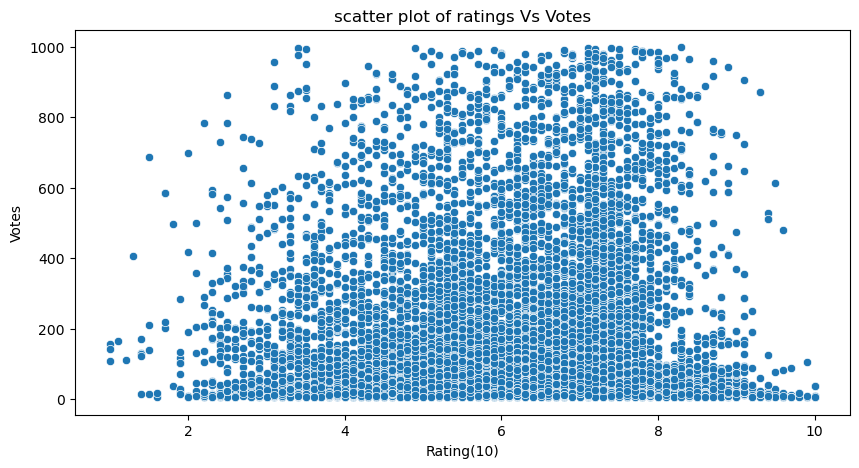

In [62]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Rating(10)',y='Votes')
plt.title("scatter plot of ratings Vs Votes")
plt.xlabel('Rating(10)')
plt.ylabel('Votes')
plt.show()

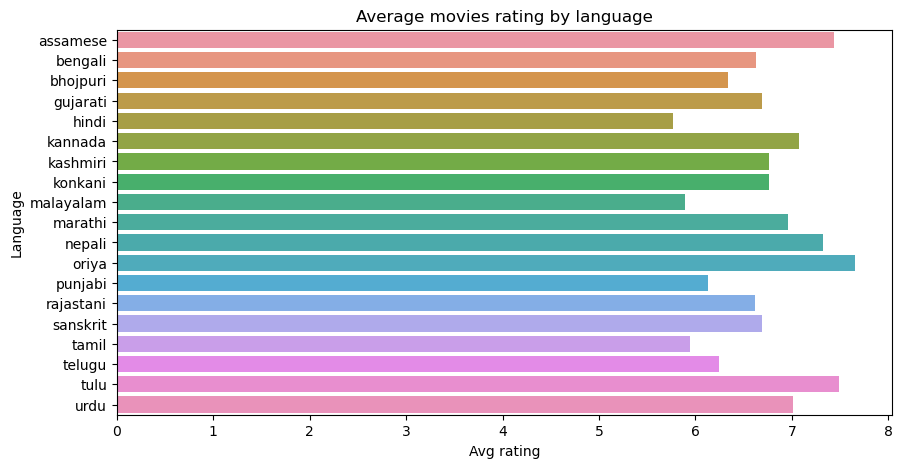

In [63]:
plt.figure(figsize=(10,5))
avg_rating=data.groupby('Language')['Rating(10)'].mean().reset_index()
sns.barplot(data=avg_rating,x='Rating(10)',y='Language')
plt.title('Average movies rating by language')
plt.xlabel("Avg rating")
plt.ylabel("Language")
plt.show()

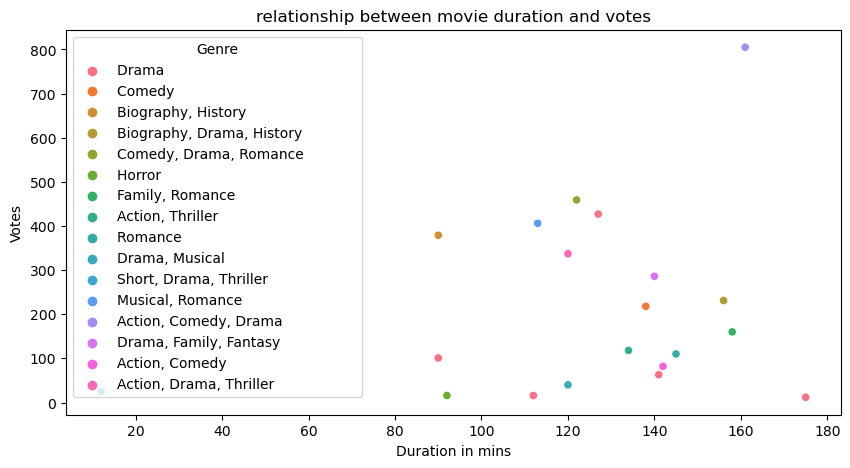

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data.iloc[0:20,:],x='Timing(min)',y='Votes',hue='Genre')
plt.title("relationship between movie duration and votes")
plt.xlabel("Duration in mins")
plt.ylabel("Votes")
plt.show()

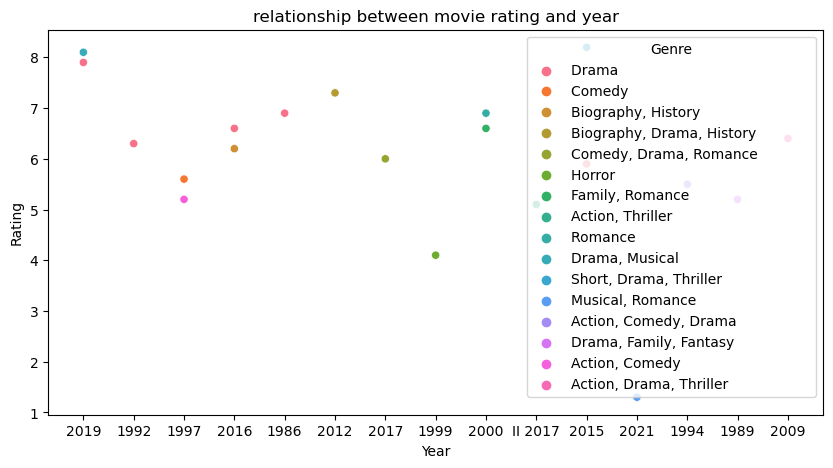

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data.iloc[0:20,:],x='Year',y='Rating(10)',hue='Genre')
plt.title("relationship between movie rating and year")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()